<a href="https://colab.research.google.com/github/kjh1696/22CPP/blob/main/autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
x = torch.tensor([1.], requires_grad = True) # float 이여야해서 1.
print(x)

tensor([1.], requires_grad=True)


In [3]:
x = torch.tensor([1.],requires_grad = True)
y = x**2
print(y)

print(x.grad)
y.backward() # y를 x로 미분한다음 1 대입, requires_grad = True 인 변수에 대해서 미분
print(x.grad)

tensor([1.], grad_fn=<PowBackward0>)
None
tensor([2.])


In [4]:
x = torch.tensor([1.], requires_grad = True) # requires_grad가 true인 텐서만 가능함
y = x**2
print(y)

z = 3*y
print(z)

z.backward()
print(x.grad)

tensor([1.], grad_fn=<PowBackward0>)
tensor([3.], grad_fn=<MulBackward0>)
tensor([6.])


In [5]:
x = torch.tensor([1.], requires_grad = True) # requires_grad가 true인 텐서만 가능함
y = x**2
print(y)
y.retain_grad() # y에 대해서도 미분을 할 것이라는 의미

z = 3*y
print(z)

z.backward()
print(x.grad)
print(y.grad)

tensor([1.], grad_fn=<PowBackward0>)
tensor([3.], grad_fn=<MulBackward0>)
tensor([6.])
tensor([3.])


In [7]:
x = torch.tensor([1.], requires_grad= True)
a = x**2
b = a + 1
print(b)
c = b ** 2
c.backward()
print(x.grad)

tensor([2.], grad_fn=<AddBackward0>)
tensor([8.])


In [8]:
x = torch.tensor([1.], requires_grad = True)
y = torch.tensor([1.], requires_grad = True)

z = 2*x**2 + y ** 2
print(z)
z.backward()

print(x.grad)
print(y.grad)

tensor([3.], grad_fn=<AddBackward0>)
tensor([4.])
tensor([2.])


In [10]:
x = torch.tensor([1., 2., 3.], requires_grad = True)
y = torch.sum(x**2) # x1**2 + x2**2 + x3**2
y.backward()

print(y)
print(x.grad)

tensor(14., grad_fn=<SumBackward0>)
tensor([2., 4., 6.])


In [11]:
# transfer learning 할 때 필요
x = torch.tensor([1.], requires_grad = True)
x.requires_grad = False

y = x**2
print(y)

tensor([1.])


In [12]:
x = torch.tensor([2.], requires_grad = True)
x2 = x.detach() # detach는 requires_grad = False인 새로운 텐서를 만드는 것을 의미

print(x)
print(x2)

y = x** 2
print(y)

y2 = x2**2
print(y2)

tensor([2.], requires_grad=True)
tensor([2.])
tensor([4.], grad_fn=<PowBackward0>)
tensor([4.])


In [16]:
# 많이 쓰이는 torch.no_grad
x = torch.tensor([1.], requires_grad= True)

# chain rule을 위해 계속 grad_fn을 업데이트 하기 때문에 grad_fn을 잠시 계산하고 싶지 않을때 torch.no_grad
# 모델 테스트 시에는 불필요하게 메모리를 쓸 필요가 없기 때문이다

with torch.no_grad():
  y = x** 2
  print(x.requires_grad) # 어떤 연산을 했는지 tracking 하지 않겠다 그렇다고 requires_grad가 False가 된것은 아님
  print(y)

print(x.requires_grad)

y = x**2
print(y)

x = torch.tensor([1.], requires_grad = True)
x.requires_grad = False

y = x**2
print(x.requires_grad)
print(y)

True
tensor([1.])
True
tensor([1.], grad_fn=<PowBackward0>)
False
tensor([1.])


In [17]:
!pip install torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

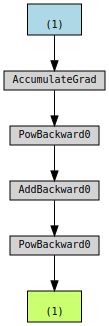

In [20]:
from torchviz import make_dot
x = torch.tensor([1.], requires_grad = True)

make_dot(x**2) # (1)은 shape을 의미함
make_dot(x**2 + 1)
make_dot((x**2+1)**2)

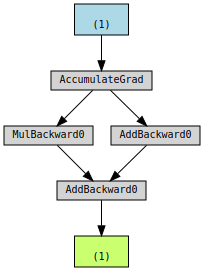

In [21]:
y = 2*x
z = 3+x
r = y+z
make_dot(r)